###  Final Project New Role Data Scientist

### A. Train Random Forest Model on cleaned data

In [105]:
#import cleaned dataset
import pandas as pd
import os as os
wd = os.getcwd()

orth = pd.read_csv(wd + "\clean_model_normalized.csv")

In [112]:
#creation of train and test datasets
from sklearn.model_selection import train_test_split

X = orth.drop(['Retained','Departure_Date','Return_Date','Deposit_Date','subjectivity','neg','neu','pos','compound'], axis = 1)
y = orth['Retained']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y, random_state=10032021)

In [113]:
#create model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion='gini', max_depth=3, min_samples_split=4, min_samples_leaf=3)
model.fit(x_test, y_test)
y_pred = model.predict(x_test)

In [114]:
#print model metrics
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

from sklearn import metrics
print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred))

[[216 153]
 [ 13 521]]
***RESULTS ON TEST SET***
f1_score:  0.8625827814569536


In [115]:
#DEFINE YOUR CLASSIFIER and THE PARAMETERS GRID
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np

classifier = RandomForestClassifier()
parameters = {'criterion': ['entropy','gini'], 
              'max_depth': [50,100,200],
              'min_samples_split': [5,10,20],
              'min_samples_leaf': [2,4,10]}

#DEFINE GRIDSEARCH 
from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=10, n_jobs=-1, refit=True)
                  
#TRAIN 
gridsearch = gridsearch.fit(x_train, y_train)
                  
#Results of your GRIDSEARCH
print('***GRIDSEARCH FINAL RESULTS***')

print("Best score: %f using %s" % (gridsearch.best_score_, gridsearch.best_params_))
means = gridsearch.cv_results_['mean_test_score']
stds = gridsearch.cv_results_['std_test_score']
params = gridsearch.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 3 folds for each of 54 candidates, totalling 162 fits
***GRIDSEARCH FINAL RESULTS***
Best score: 0.895771 using {'criterion': 'entropy', 'max_depth': 100, 'min_samples_leaf': 2, 'min_samples_split': 5}
0.892345 (0.008731) with: {'criterion': 'entropy', 'max_depth': 50, 'min_samples_leaf': 2, 'min_samples_split': 5}
0.894412 (0.008177) with: {'criterion': 'entropy', 'max_depth': 50, 'min_samples_leaf': 2, 'min_samples_split': 10}
0.889304 (0.012751) with: {'criterion': 'entropy', 'max_depth': 50, 'min_samples_leaf': 2, 'min_samples_split': 20}
0.883277 (0.009803) with: {'criterion': 'entropy', 'max_depth': 50, 'min_samples_leaf': 4, 'min_samples_split': 5}
0.881933 (0.007341) with: {'criterion': 'entropy', 'max_depth': 50, 'min_samples_leaf': 4, 'min_samples_split': 10}
0.878942 (0.010340) with: {'criterion': 'entropy', 'max_depth': 50, 'min_samples_leaf': 4, 'min_samples_split': 20}
0.871770 (0.016127) with: {'criterion': 'entropy', 'max_depth': 50, 'min_samples_leaf': 10, 'min

In [116]:
#winner
#TEST ON TEST SET 
winner_model = gridsearch.best_estimator_
print(gridsearch.best_params_)

y_pred = winner_model.predict(x_test)
print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))


{'criterion': 'entropy', 'max_depth': 100, 'min_samples_leaf': 2, 'min_samples_split': 5}
***RESULTS ON TEST SET***
f1_score:  0.925756186984418
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       369
           1       0.91      0.95      0.93       534

    accuracy                           0.91       903
   macro avg       0.91      0.90      0.91       903
weighted avg       0.91      0.91      0.91       903

[[317  52]
 [ 29 505]]


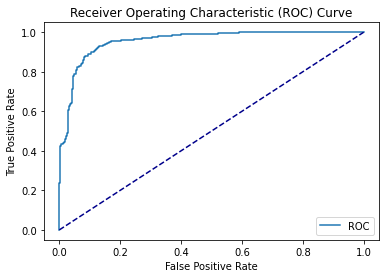

AUC: 0.96


In [117]:
# ROC Curve of winner model {'criterion': 'entropy', 'max_depth': 50, 'min_samples_leaf': 2, 'min_samples_split': 5}
#from sklearn import metrics
#model = RandomForestClassifier(criterion='entropy', max_depth=50, min_samples_leaf=2, min_samples_split=5)
winner_model.fit(x_train, y_train)
y_pred_1 = winner_model.predict(x_test)

y_probs = winner_model.predict_proba(x_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

In [118]:
#analyzing obtained tree
x_train.columns.tolist()

['Unnamed: 0',
 'From_Grade',
 'To_Grade',
 'Days',
 'Cancelled_Pax',
 'Total_Discount_Pax',
 'FPP',
 'Total_Pax',
 'FPP_to_School_enrollment',
 'ID',
 'Tuition',
 'FRP_Active',
 'FRP_Cancelled',
 'FRP_Take_up_percent_',
 'EZ_Pay_Take_Up_Rate',
 'School_Sponsor',
 'SPR_Group_Revenue',
 'FPP_to_PAX',
 'Num_of_Non_FPP_PAX',
 'Poverty_Code',
 'CRM_Segment',
 'Parent_Meeting_Flag',
 'MDR_High_Grade',
 'Total_School_Enrollment',
 'Income_Level',
 'SPR_New_Existing',
 'NumberOfMeetingswithParents',
 'DifferenceTraveltoFirstMeeting',
 'DifferenceTraveltoLastMeeting',
 'polarity',
 'Is_Region_Dallas',
 'Is_Region_Houston',
 'Is_Region_Northern California',
 'Is_Region_Other',
 'Is_Region_Pacific Northwest',
 'Is_Region_Southern California',
 'Is_School_Type_CHD',
 'Is_School_Type_PUBLIC',
 'Is_SPR_Product_Type_CA History',
 'Is_SPR_Product_Type_Costa Rica',
 'Is_SPR_Product_Type_East Coast',
 'Is_SPR_Product_Type_IL History',
 'Is_SPR_Product_Type_International',
 'Is_SPR_Product_Type_Science'

In [119]:
#select top features to explain 'retained' field target
from sklearn.feature_selection import SelectKBest
fs = SelectKBest(k= 1)
fs.fit(x_train, y_train)
df_fs = pd.DataFrame(data = fs.scores_,  columns=["SCORES"])
df_fs['Features'] = x_train.columns
print(df_fs.sort_values(ascending=False, by=['SCORES'])[0:50])

         SCORES                           Features
29   952.938481                           polarity
11   158.543926                         FRP_Active
7    125.597499                          Total_Pax
6    122.716189                                FPP
129  112.299794        Is_SchoolGradeTypeHigh_High
93   111.590275         Is_GroupGradeTypeHigh_High
18    86.739202                 Num_of_Non_FPP_PAX
94    83.224833       Is_GroupGradeTypeHigh_Middle
5     83.095840                 Total_Discount_Pax
125   81.361571         Is_SchoolGradeTypeLow_High
130   69.860567      Is_SchoolGradeTypeHigh_Middle
134   68.914350           Is_SchoolSizeIndicator_S
145   64.103316                 Is_MDR_Low_Grade_9
142   58.413011                 Is_MDR_Low_Grade_6
126   54.319637       Is_SchoolGradeTypeLow_Middle
22    50.219043                     MDR_High_Grade
24    47.621942                       Income_Level
17    44.616945                         FPP_to_PAX
95    35.738135              Is

d:\projects\jupiter\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [53 91] are constant.
  UserWarning)
d:\projects\jupiter\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [104]:
#order some features per target correlation
x_train['Retained'] = y_train
print(x_train.corr()['Retained'].abs().sort_values(ascending=False).head(60))

Retained                             1.000000
polarity                             0.568569
FRP_Active                           0.257944
Total_Pax                            0.246528
FPP                                  0.245508
Is_SchoolGradeTypeHigh_High          0.231772
Num_of_Non_FPP_PAX                   0.218520
Total_Discount_Pax                   0.215911
Is_GroupGradeTypeHigh_High           0.212598
Is_GroupGradeTypeHigh_Middle         0.186478
Is_SchoolGradeTypeLow_High           0.182799
Is_SchoolSizeIndicator_S             0.181162
Is_SchoolGradeTypeHigh_Middle        0.166657
Is_MDR_Low_Grade_6                   0.165785
Is_MajorProgramCode_H                0.160508
MDR_High_Grade                       0.154564
Is_MDR_Low_Grade_9                   0.153574
Is_SPR_Product_Type_East Coast       0.143950
Is_MajorProgramCode_S                0.143831
FPP_to_PAX                           0.137822
Is_SchoolGradeTypeLow_Middle         0.134823
Income_Level                      

d:\projects\jupiter\venv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
